In [3]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

Using TensorFlow backend.


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

In [94]:
import os
os.chdir("C:\\Users\\bcg2\\Downloads\\")
raw_data = pd.read_csv("AllCategoryConsolidatedData4_final_train_v20107.csv")

In [95]:
raw_data.head(5)

,CATEGORY_NAME,CLASS_NAME,SLEEVE SIZE,MRP,BLEND,FIT,STYLE_GROUP_2,FABRIC,MATERIAL_GROUP,PATTERN,...,LastYear_MinRoS,LastYear_MaxRoS,RoS_cap,Avg_RoS_Mrp,Avg_RoS_pattern,Avg_RoS_color,Avg_RoS_blend,Avg_RoS_brand,Avg_RoS_hit,Color Family
0,APPAREL INFANT,3 BY 4TH BOTTOMS,IN-10:20,449,COTTON,UNKNOWN,FASHION,RIB,WOVEN,SOLID,...,0.0,0.000000,0.472158,0.486940,0.452680,0.386357,0.442885,0.799031,0.395965,BROWN
1,APPAREL INFANT,3 BY 4TH BOTTOMS,IN-10:20,449,COTTON,UNKNOWN,FASHION,RIB,WOVEN,SOLID,...,0.0,0.000000,0.335529,0.486940,0.452680,0.427874,0.442885,0.799031,0.395965,BLUE
2,APPAREL INFANT,3 BY 4TH BOTTOMS,IN-20:30,249,COTTON,UNKNOWN,FASHION,FLEECE,KNITS,SOLID,...,0.0,0.000000,0.320565,0.570490,0.452680,0.427874,0.442885,0.799031,0.539097,BLUE
3,APPAREL INFANT,3 BY 4TH BOTTOMS,IN-20:30,249,COTTON,UNKNOWN,FASHION,FLEECE,KNITS,SOLID,...,0.0,0.000000,0.820416,0.570490,0.452680,0.820416,0.442885,0.799031,0.539097,RED
4,APPAREL INFANT,3 BY 4TH BOTTOMS,IN-20:30,249,COTTON,UNKNOWN,FASHION,POPLIN,KNITS,SOLID,...,0.0,0.404264,0.199222,0.352891,1.008104,0.160654,0.940928,0.583034,0.255274,GREEN


In [96]:
raw_data.columns

Index(['CATEGORY_NAME', 'CLASS_NAME', 'SLEEVE SIZE', 'MRP', 'BLEND', 'FIT',
       'STYLE_GROUP_2', 'FABRIC', 'MATERIAL_GROUP', 'PATTERN',
       'Median_Days_Difference', 'GENDER', 'New_Fit', 'BRAND_NAME_FINAL',
       'Apparel_Styling_New', 'Lumionosity', 'Primary_Blend',
       'Secondary_Blend', 'Third_Blend', 'OPTION_ANNUAL_TREND', 'Hit',
       'Season Type', 'Brand_presence', 'Annual Last season Avg. RoS',
       'Seasonal Last season Avg. RoS', 'Annual_RoS', 'Cat_Class_RoS_lag1',
       'Cat_Class_RoS_lag2', 'Cat_Class_RoS_lag3', 'LastYear_MeanRoS',
       'LastYear_MinRoS', 'LastYear_MaxRoS', 'RoS_cap', 'Avg_RoS_Mrp',
       'Avg_RoS_pattern', 'Avg_RoS_color', 'Avg_RoS_blend', 'Avg_RoS_brand',
       'Avg_RoS_hit', 'Color Family'],
      dtype='object')

In [78]:
raw_data.dropna(how='all',axis=1,inplace=True)

In [79]:
raw_data.shape

(7381, 40)

In [15]:
def get_cols_with_no_nans(df,col_type):
    if (col_type == 'num'):
        predictors = df.select_dtypes(exclude=['object'])
    elif (col_type == 'no_num'):
        predictors = df.select_dtypes(include=['object'])
    elif (col_type == 'all'):
        predictors = df
    else :
        print('Error : choose a type (num, no_num, all)')
    return 0
    cols_with_no_nans = []
    for col in predictors.columns:
        if not df[col].isnull().any():
            cols_with_no_nans.append(col)
    return cols_with_no_nans

In [26]:
num_cols = get_cols_with_no_nans(raw_data , 'num')
cat_cols = get_cols_with_no_nans(raw_data , 'no_num')


0

In [80]:
predictors = raw_data.select_dtypes(include=['object'])
predictors.columns

Index(['CATEGORY_NAME', 'CLASS_NAME', 'SLEEVE SIZE', 'BLEND', 'FIT',
       'STYLE_GROUP_2', 'FABRIC', 'MATERIAL_GROUP', 'PATTERN', 'GENDER',
       'New_Fit', 'BRAND_NAME_FINAL', 'Apparel_Styling_New', 'Primary_Blend',
       'Secondary_Blend', 'Third_Blend', 'Hit', 'Season Type', 'Color Family'],
      dtype='object')

In [81]:
raw_data.isnull().values.any()

False

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000D95DF55DA0>,
      dtype=object)

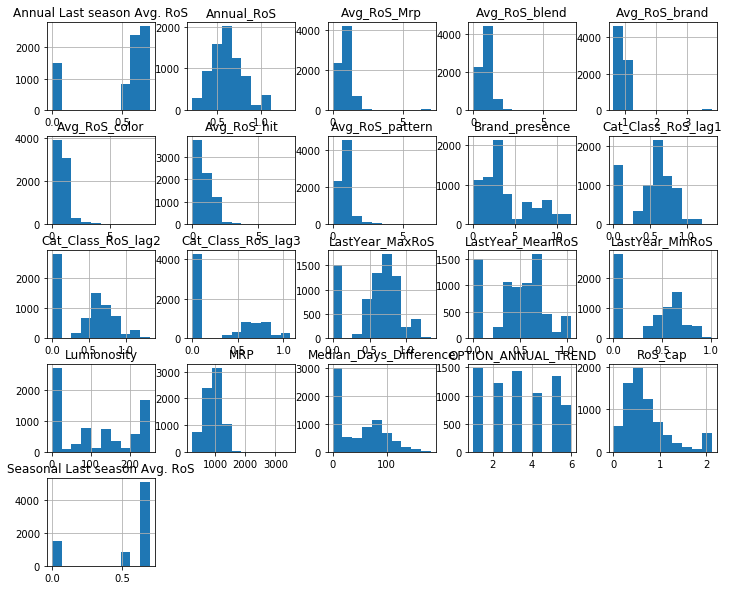

In [82]:
raw_data.hist(figsize=(12,10))

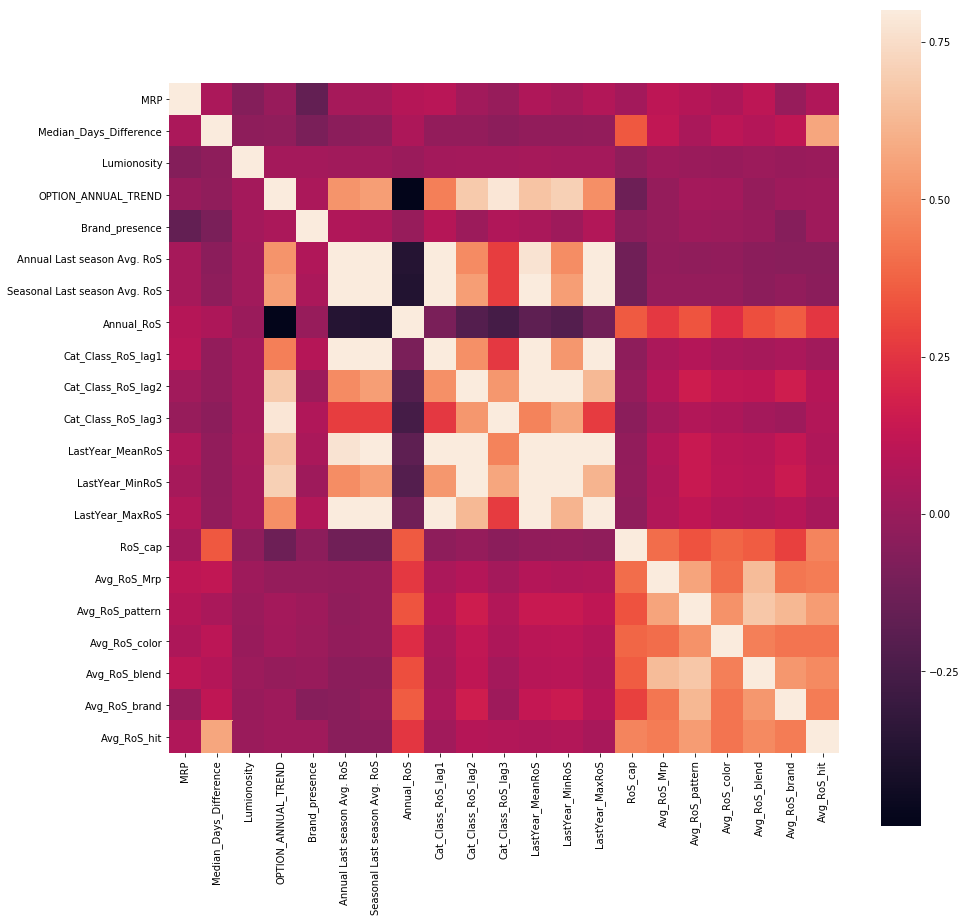

In [83]:
#Correlation between the features
C_mat = raw_data.corr()
fig = plt.figure(figsize = (15,15))

sb.heatmap(C_mat, vmax = .8, square = True)
plt.show()

In [84]:
#One hot encoding of categorical features
def oneHotEncode(df,colNames):
    for col in colNames:
        if( df[col].dtype == np.dtype('object')):
            dummies = pd.get_dummies(df[col],prefix=col)
            df = pd.concat([df,dummies],axis=1)

            #drop the encoded column
            df.drop([col],axis = 1 , inplace=True)
    return df
    

print('There were {} columns before encoding categorical features'.format(raw_data.shape[1]))
raw_data2 = oneHotEncode(raw_data, predictors.columns)
print('There are {} columns after encoding categorical features'.format(raw_data2.shape[1]))

There were 40 columns before encoding categorical features
There are 210 columns after encoding categorical features


In [85]:
y_train = raw_data2['RoS_cap']
X = raw_data2.drop('RoS_cap',axis=1)

In [86]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, y_train, test_size = 0.15, random_state = 0)

In [97]:
print('shape')
print('Xtrain =',xTrain.shape)
print('xTest =',xTest.shape)
print('yTrain =',xTrain.shape)
print('yTest =',xTest.shape)

shape
Xtrain = (5904, 209)
xTest = (1477, 209)
yTrain = (5904, 209)
yTest = (1477, 209)


In [113]:
# Defining neural networks

NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(units=128, kernel_initializer='normal',input_dim = xTrain.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(units=256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(units=256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(units=256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(units=1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 128)               26880     
_________________________________________________________________
dense_32 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_33 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_34 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 257       
Total params: 191,745
Trainable params: 191,745
Non-trainable params: 0
_________________________________________________________________


In [100]:
#Defining a checkpoint callback
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [ ]:
NN_model.fit(xTrain, yTrain, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Train on 4723 samples, validate on 1181 samples
Epoch 1/500
4723/4723 [==============================] - 1s 241us/step - loss: 0.5252 - mean_absolute_error: 0.5252 - val_loss: 0.3188 - val_mean_absolute_error: 0.3188

Epoch 00001: val_loss improved from 0.68135 to 0.31881, saving model to Weights-001--0.31881.hdf5
Epoch 2/500
4723/4723 [==============================] - 1s 116us/step - loss: 0.3546 - mean_absolute_error: 0.3546 - val_loss: 0.3361 - val_mean_absolute_error: 0.3361

Epoch 00002: val_loss did not improve from 0.31881
Epoch 3/500
4723/4723 [==============================] - 1s 122us/step - loss: 0.3363 - mean_absolute_error: 0.3363 - val_loss: 0.3251 - val_mean_absolute_error: 0.3251

Epoch 00003: val_loss did not improve from 0.31881
Epoch 4/500
4723/4723 [==============================] - 1s 112us/step - loss: 0.3336 - mean_absolute_error: 0.3336 - val_loss: 0.3133 - val_mean_absolute_error: 0.3133

Epoch 00004: val_loss improved from 0.31881 to 0.31330, saving model to 


Epoch 00035: val_loss did not improve from 0.24332
Epoch 36/500
4723/4723 [==============================] - 1s 118us/step - loss: 0.2581 - mean_absolute_error: 0.2581 - val_loss: 0.2524 - val_mean_absolute_error: 0.2524

Epoch 00036: val_loss did not improve from 0.24332
Epoch 37/500
4723/4723 [==============================] - 1s 213us/step - loss: 0.2590 - mean_absolute_error: 0.2590 - val_loss: 0.2447 - val_mean_absolute_error: 0.2447

Epoch 00037: val_loss did not improve from 0.24332
Epoch 38/500
4723/4723 [==============================] - 1s 123us/step - loss: 0.2633 - mean_absolute_error: 0.2633 - val_loss: 0.2428 - val_mean_absolute_error: 0.2428

Epoch 00038: val_loss improved from 0.24332 to 0.24282, saving model to Weights-038--0.24282.hdf5
Epoch 39/500
4723/4723 [==============================] - 1s 115us/step - loss: 0.2546 - mean_absolute_error: 0.2546 - val_loss: 0.2504 - val_mean_absolute_error: 0.2504

Epoch 00039: val_loss did not improve from 0.24282
Epoch 40/500


4723/4723 [==============================] - 1s 143us/step - loss: 0.2472 - mean_absolute_error: 0.2472 - val_loss: 0.2752 - val_mean_absolute_error: 0.2752

Epoch 00071: val_loss did not improve from 0.23296
Epoch 72/500
4723/4723 [==============================] - 1s 111us/step - loss: 0.2433 - mean_absolute_error: 0.2433 - val_loss: 0.2387 - val_mean_absolute_error: 0.2387

Epoch 00072: val_loss did not improve from 0.23296
Epoch 73/500
4723/4723 [==============================] - 1s 115us/step - loss: 0.2395 - mean_absolute_error: 0.2395 - val_loss: 0.2322 - val_mean_absolute_error: 0.2322

Epoch 00073: val_loss improved from 0.23296 to 0.23221, saving model to Weights-073--0.23221.hdf5
Epoch 74/500
4723/4723 [==============================] - 1s 116us/step - loss: 0.2378 - mean_absolute_error: 0.2378 - val_loss: 0.2544 - val_mean_absolute_error: 0.2544

Epoch 00074: val_loss did not improve from 0.23221
Epoch 75/500
4723/4723 [==============================] - 1s 126us/step - loss


Epoch 00106: val_loss did not improve from 0.22360
Epoch 107/500
4723/4723 [==============================] - 1s 167us/step - loss: 0.2249 - mean_absolute_error: 0.2249 - val_loss: 0.2393 - val_mean_absolute_error: 0.2393

Epoch 00107: val_loss did not improve from 0.22360
Epoch 108/500
4723/4723 [==============================] - 1s 121us/step - loss: 0.2286 - mean_absolute_error: 0.2286 - val_loss: 0.2388 - val_mean_absolute_error: 0.2388

Epoch 00108: val_loss did not improve from 0.22360
Epoch 109/500
4723/4723 [==============================] - 1s 118us/step - loss: 0.2271 - mean_absolute_error: 0.2271 - val_loss: 0.2276 - val_mean_absolute_error: 0.2276

Epoch 00109: val_loss did not improve from 0.22360
Epoch 110/500
4723/4723 [==============================] - 1s 210us/step - loss: 0.2251 - mean_absolute_error: 0.2251 - val_loss: 0.2330 - val_mean_absolute_error: 0.2330

Epoch 00110: val_loss did not improve from 0.22360
Epoch 111/500
4723/4723 [==============================]

4723/4723 [==============================] - 1s 122us/step - loss: 0.2173 - mean_absolute_error: 0.2173 - val_loss: 0.2238 - val_mean_absolute_error: 0.2238

Epoch 00143: val_loss did not improve from 0.22245
Epoch 144/500
4723/4723 [==============================] - 1s 113us/step - loss: 0.2182 - mean_absolute_error: 0.2182 - val_loss: 0.2249 - val_mean_absolute_error: 0.2249

Epoch 00144: val_loss did not improve from 0.22245
Epoch 145/500
4723/4723 [==============================] - 1s 123us/step - loss: 0.2188 - mean_absolute_error: 0.2188 - val_loss: 0.2246 - val_mean_absolute_error: 0.2246

Epoch 00145: val_loss did not improve from 0.22245
Epoch 146/500
4723/4723 [==============================] - 1s 112us/step - loss: 0.2180 - mean_absolute_error: 0.2180 - val_loss: 0.2247 - val_mean_absolute_error: 0.2247

Epoch 00146: val_loss did not improve from 0.22245
Epoch 147/500
4723/4723 [==============================] - 1s 113us/step - loss: 0.2173 - mean_absolute_error: 0.2173 - va

4723/4723 [==============================] - 1s 115us/step - loss: 0.2058 - mean_absolute_error: 0.2058 - val_loss: 0.2329 - val_mean_absolute_error: 0.2329

Epoch 00179: val_loss did not improve from 0.21687
Epoch 180/500
4723/4723 [==============================] - 1s 137us/step - loss: 0.2084 - mean_absolute_error: 0.2084 - val_loss: 0.2336 - val_mean_absolute_error: 0.2336

Epoch 00180: val_loss did not improve from 0.21687
Epoch 181/500
4723/4723 [==============================] - 1s 111us/step - loss: 0.2062 - mean_absolute_error: 0.2062 - val_loss: 0.2419 - val_mean_absolute_error: 0.2419

Epoch 00181: val_loss did not improve from 0.21687
Epoch 182/500
4723/4723 [==============================] - 1s 152us/step - loss: 0.2038 - mean_absolute_error: 0.2038 - val_loss: 0.2223 - val_mean_absolute_error: 0.2223

Epoch 00182: val_loss did not improve from 0.21687
Epoch 183/500
4723/4723 [==============================] - 1s 112us/step - loss: 0.2028 - mean_absolute_error: 0.2028 - va

4723/4723 [==============================] - 1s 109us/step - loss: 0.1965 - mean_absolute_error: 0.1965 - val_loss: 0.2245 - val_mean_absolute_error: 0.2245

Epoch 00216: val_loss did not improve from 0.21687
Epoch 217/500
4723/4723 [==============================] - 1s 110us/step - loss: 0.1934 - mean_absolute_error: 0.1934 - val_loss: 0.2292 - val_mean_absolute_error: 0.2292

Epoch 00217: val_loss did not improve from 0.21687
Epoch 218/500
4723/4723 [==============================] - 1s 111us/step - loss: 0.1956 - mean_absolute_error: 0.1956 - val_loss: 0.2535 - val_mean_absolute_error: 0.2535

Epoch 00218: val_loss did not improve from 0.21687
Epoch 219/500
4723/4723 [==============================] - 1s 110us/step - loss: 0.1948 - mean_absolute_error: 0.1948 - val_loss: 0.2299 - val_mean_absolute_error: 0.2299

Epoch 00219: val_loss did not improve from 0.21687
Epoch 220/500
4723/4723 [==============================] - 1s 110us/step - loss: 0.1940 - mean_absolute_error: 0.1940 - va

4723/4723 [==============================] - 1s 110us/step - loss: 0.1830 - mean_absolute_error: 0.1830 - val_loss: 0.2254 - val_mean_absolute_error: 0.2254

Epoch 00253: val_loss did not improve from 0.21687
Epoch 254/500
4723/4723 [==============================] - 1s 109us/step - loss: 0.1828 - mean_absolute_error: 0.1828 - val_loss: 0.2254 - val_mean_absolute_error: 0.2254

Epoch 00254: val_loss did not improve from 0.21687
Epoch 255/500
4723/4723 [==============================] - 1s 109us/step - loss: 0.1803 - mean_absolute_error: 0.1803 - val_loss: 0.2307 - val_mean_absolute_error: 0.2307

Epoch 00255: val_loss did not improve from 0.21687
Epoch 256/500
4723/4723 [==============================] - 1s 109us/step - loss: 0.1853 - mean_absolute_error: 0.1853 - val_loss: 0.2312 - val_mean_absolute_error: 0.2312

Epoch 00256: val_loss did not improve from 0.21687
Epoch 257/500
4723/4723 [==============================] - 1s 112us/step - loss: 0.1789 - mean_absolute_error: 0.1789 - va

4723/4723 [==============================] - 1s 116us/step - loss: 0.1758 - mean_absolute_error: 0.1758 - val_loss: 0.2348 - val_mean_absolute_error: 0.2348

Epoch 00290: val_loss did not improve from 0.21687
Epoch 291/500
4723/4723 [==============================] - 1s 113us/step - loss: 0.1781 - mean_absolute_error: 0.1781 - val_loss: 0.2288 - val_mean_absolute_error: 0.2288

Epoch 00291: val_loss did not improve from 0.21687
Epoch 292/500
4723/4723 [==============================] - 1s 111us/step - loss: 0.1731 - mean_absolute_error: 0.1731 - val_loss: 0.2288 - val_mean_absolute_error: 0.2288

Epoch 00292: val_loss did not improve from 0.21687
Epoch 293/500
4723/4723 [==============================] - 1s 108us/step - loss: 0.1729 - mean_absolute_error: 0.1729 - val_loss: 0.2332 - val_mean_absolute_error: 0.2332

Epoch 00293: val_loss did not improve from 0.21687
Epoch 294/500
4723/4723 [==============================] - 1s 108us/step - loss: 0.1722 - mean_absolute_error: 0.1722 - va

4723/4723 [==============================] - 1s 111us/step - loss: 0.1673 - mean_absolute_error: 0.1673 - val_loss: 0.2363 - val_mean_absolute_error: 0.2363

Epoch 00327: val_loss did not improve from 0.21687
Epoch 328/500
4723/4723 [==============================] - 1s 108us/step - loss: 0.1642 - mean_absolute_error: 0.1642 - val_loss: 0.2264 - val_mean_absolute_error: 0.2264

Epoch 00328: val_loss did not improve from 0.21687
Epoch 329/500
4723/4723 [==============================] - 1s 109us/step - loss: 0.1660 - mean_absolute_error: 0.1660 - val_loss: 0.2309 - val_mean_absolute_error: 0.2309

Epoch 00329: val_loss did not improve from 0.21687
Epoch 330/500
4723/4723 [==============================] - 1s 108us/step - loss: 0.1636 - mean_absolute_error: 0.1636 - val_loss: 0.2301 - val_mean_absolute_error: 0.2301

Epoch 00330: val_loss did not improve from 0.21687
Epoch 331/500
4723/4723 [==============================] - 1s 109us/step - loss: 0.1683 - mean_absolute_error: 0.1683 - va

4723/4723 [==============================] - 1s 110us/step - loss: 0.1586 - mean_absolute_error: 0.1586 - val_loss: 0.2309 - val_mean_absolute_error: 0.2309

Epoch 00364: val_loss did not improve from 0.21687
Epoch 365/500
4723/4723 [==============================] - 1s 109us/step - loss: 0.1531 - mean_absolute_error: 0.1531 - val_loss: 0.2369 - val_mean_absolute_error: 0.2369

Epoch 00365: val_loss did not improve from 0.21687
Epoch 366/500
4723/4723 [==============================] - 1s 118us/step - loss: 0.1616 - mean_absolute_error: 0.1616 - val_loss: 0.2334 - val_mean_absolute_error: 0.2334

Epoch 00366: val_loss did not improve from 0.21687
Epoch 367/500
4723/4723 [==============================] - 1s 116us/step - loss: 0.1532 - mean_absolute_error: 0.1532 - val_loss: 0.2466 - val_mean_absolute_error: 0.2466

Epoch 00367: val_loss did not improve from 0.21687
Epoch 368/500
4723/4723 [==============================] - 1s 111us/step - loss: 0.1569 - mean_absolute_error: 0.1569 - va


Epoch 00400: val_loss did not improve from 0.21687
Epoch 401/500
4723/4723 [==============================] - 1s 126us/step - loss: 0.1503 - mean_absolute_error: 0.1503 - val_loss: 0.2357 - val_mean_absolute_error: 0.2357

Epoch 00401: val_loss did not improve from 0.21687
Epoch 402/500
4723/4723 [==============================] - 1s 147us/step - loss: 0.1516 - mean_absolute_error: 0.1516 - val_loss: 0.2282 - val_mean_absolute_error: 0.2282

Epoch 00402: val_loss did not improve from 0.21687
Epoch 403/500
4723/4723 [==============================] - 1s 116us/step - loss: 0.1455 - mean_absolute_error: 0.1455 - val_loss: 0.2328 - val_mean_absolute_error: 0.2328

Epoch 00403: val_loss did not improve from 0.21687
Epoch 404/500
4723/4723 [==============================] - 1s 122us/step - loss: 0.1496 - mean_absolute_error: 0.1496 - val_loss: 0.2318 - val_mean_absolute_error: 0.2318

Epoch 00404: val_loss did not improve from 0.21687
Epoch 405/500
4723/4723 [==============================]


Epoch 00437: val_loss did not improve from 0.21687
Epoch 438/500
4723/4723 [==============================] - 1s 110us/step - loss: 0.1402 - mean_absolute_error: 0.1402 - val_loss: 0.2357 - val_mean_absolute_error: 0.2357

Epoch 00438: val_loss did not improve from 0.21687
Epoch 439/500
4723/4723 [==============================] - 1s 108us/step - loss: 0.1429 - mean_absolute_error: 0.1429 - val_loss: 0.2393 - val_mean_absolute_error: 0.2393

Epoch 00439: val_loss did not improve from 0.21687
Epoch 440/500
4723/4723 [==============================] - 1s 110us/step - loss: 0.1423 - mean_absolute_error: 0.1423 - val_loss: 0.2388 - val_mean_absolute_error: 0.2388

Epoch 00440: val_loss did not improve from 0.21687
Epoch 441/500
4723/4723 [==============================] - 1s 109us/step - loss: 0.1433 - mean_absolute_error: 0.1433 - val_loss: 0.2369 - val_mean_absolute_error: 0.2369

Epoch 00441: val_loss did not improve from 0.21687
Epoch 442/500
4723/4723 [==============================]


Epoch 00474: val_loss did not improve from 0.21687
Epoch 475/500
4723/4723 [==============================] - 1s 138us/step - loss: 0.1356 - mean_absolute_error: 0.1356 - val_loss: 0.2304 - val_mean_absolute_error: 0.2304

Epoch 00475: val_loss did not improve from 0.21687
Epoch 476/500
4723/4723 [==============================] - 1s 125us/step - loss: 0.1411 - mean_absolute_error: 0.1411 - val_loss: 0.2475 - val_mean_absolute_error: 0.2475

Epoch 00476: val_loss did not improve from 0.21687
Epoch 477/500
4723/4723 [==============================] - 1s 133us/step - loss: 0.1383 - mean_absolute_error: 0.1383 - val_loss: 0.2328 - val_mean_absolute_error: 0.2328

Epoch 00477: val_loss did not improve from 0.21687
Epoch 478/500
4723/4723 [==============================] - 1s 189us/step - loss: 0.1356 - mean_absolute_error: 0.1356 - val_loss: 0.2355 - val_mean_absolute_error: 0.2355

Epoch 00478: val_loss did not improve from 0.21687
Epoch 479/500
4723/4723 [==============================]

In [69]:
wights_file = 'Weights-478--18738.19831.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

OSError: Unable to open file (unable to open file: name = 'Weights-478--18738.19831.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [111]:
predictions = NN_model.predict(xTest)

In [112]:
predictions

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [103]:
yTest2 = np.array(yTest)
yTest2

array([0.62812211, 0.13853238, 0.58409987, ..., 0.56114429, 0.63609044,
       0.31324015])

In [104]:
np.savetxt("predictions1206.csv",predictions)
np.savetxt("testlabel1206.csv",yTest2)